In [2]:
%pip install funpymodeling

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 215.5/215.5 kB 14.4 MB/s eta 0:00:00
  Created wheel for sklearn: filename=sklearn-0.0.post4-py3-none-any.whl size=2973 sha256=2adc9250d9dc1477ca9df614b21e51393972741d9fa6bb256f0e488c961b41bd
  Stored in directory: /root/.cache/pip/wheels/46/b8/69/4f7789b7d2fc0718a44cbc4ae5d40970a40c22c472ae50f0a1
Successfully built sklearn
  Attempting uninstall: seaborn
    Found existing installation: seaborn 0.12.2
    Uninstalling seaborn-0.12.2:
      Successfully uninstalled seaborn-0.12.2


In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from funpymodeling.exploratory import freq_tbl 

In [4]:
#Carga desde un archivo .xlsx sin indice
df= pd.read_excel('microretailer_mit_lift_lab.xlsx') 

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 171 entries, 0 to 170
Columns: 106 entries, _record_id to 235_email
dtypes: float64(23), int64(2), object(81)
memory usage: 141.7+ KB


In [6]:
#Imprimo los primeros 5 registro del dataframe
df.head()

,_record_id,_title,_server_updated_at,_updated_by,_geometry,_latitude,_longitude,228_store_name,229_store_picture,232_type_of_store,...,261_technology_organization,262_technology_serve_customers,263_technology_secure_sales,264_technology_budget,267_technology_investment_customer_preferences,234_willingness_participate_workshop,318_shopkeeper_name,319_shopkeepers_last_name,236_whatsapp,235_email
0,dff2998e-af74-4de6-8efd-488aca24e67b,"November 12, 2022",2022-11-12 22:15:10 UTC,Salomon Abdala Perez,SRID=4326;POINT(-98.233822273 19.0535362706),19.053536,-98.233822,Eugene’s Compostura,1 Photo,Tailor,...,NaN,NaN,NaN,NaN,NaN,no,NaN,NaN,NaN,NaN
1,c596412f-4fc2-4983-acba-d9565859e42f,"November 12, 2022",2022-11-12 22:15:09 UTC,Salomon Abdala Perez,SRID=4326;POINT(-98.2341421351 19.0535610353),19.053561,-98.234142,Frutas y verduras Angy,1 Photo,Grocery store (aka. nanostore),...,NaN,NaN,NaN,NaN,NaN,no,NaN,NaN,NaN,NaN
2,5bb632b3-41b5-4fb6-a817-b564e8b45a48,"November 12, 2022",2022-11-12 22:15:09 UTC,Salomon Abdala Perez,SRID=4326;POINT(-98.232299887 19.058654656),19.058655,-98.232300,Libélula,1 Photo,Grocery store (aka. nanostore),...,NaN,NaN,NaN,NaN,NaN,no,NaN,NaN,NaN,NaN
3,6774a0f6-bab4-4a58-bf94-95ad0b7cb438,"November 12, 2022",2022-11-12 22:15:09 UTC,Salomon Abdala Perez,SRID=4326;POINT(-98.2331576513 19.0592929035),19.059293,-98.233158,Quality fix,1 Photo,Grocery store (aka. nanostore),...,NaN,NaN,NaN,NaN,NaN,no,NaN,NaN,NaN,NaN
4,6cc637fa-3d54-48c7-9499-6de13d0a26aa,"November 12, 2022",2022-11-12 22:15:08 UTC,Salomon Abdala Perez,SRID=4326;POINT(-98.2338639604 19.0595846029),19.059585,-98.233864,Artesanías Los Pinos,1 Photo,Grocery store (aka. nanostore),...,NaN,NaN,NaN,NaN,NaN,no,NaN,NaN,NaN,NaN


In [7]:
#Corroboramos valores nulos
valores_nulos=df.isnull().sum()
valores_nulos

_record_id                                0
_title                                    0
_server_updated_at                        0
_updated_by                               0
_geometry                                 0
                                       ... 
234_willingness_participate_workshop     73
318_shopkeeper_name                     123
319_shopkeepers_last_name               125
236_whatsapp                            129
235_email                               142
Length: 106, dtype: int64

In [8]:
#Reemplazamos valores nulos del dataframe con "bfill"
data1 =df.fillna(method="bfill") 
data1

,_record_id,_title,_server_updated_at,_updated_by,_geometry,_latitude,_longitude,228_store_name,229_store_picture,232_type_of_store,...,261_technology_organization,262_technology_serve_customers,263_technology_secure_sales,264_technology_budget,267_technology_investment_customer_preferences,234_willingness_participate_workshop,318_shopkeeper_name,319_shopkeepers_last_name,236_whatsapp,235_email
0,dff2998e-af74-4de6-8efd-488aca24e67b,"November 12, 2022",2022-11-12 22:15:10 UTC,Salomon Abdala Perez,SRID=4326;POINT(-98.233822273 19.0535362706),19.053536,-98.233822,Eugene’s Compostura,1 Photo,Tailor,...,De acuerdo,De acuerdo,Ni de acuerdo ni en desacuerdo,En desacuerdo,En desacuerdo,no,Fernanda,Escobedo,2.224524e+09,fer.escobedo.meneses@gmail.com
1,c596412f-4fc2-4983-acba-d9565859e42f,"November 12, 2022",2022-11-12 22:15:09 UTC,Salomon Abdala Perez,SRID=4326;POINT(-98.2341421351 19.0535610353),19.053561,-98.234142,Frutas y verduras Angy,1 Photo,Grocery store (aka. nanostore),...,De acuerdo,De acuerdo,Ni de acuerdo ni en desacuerdo,En desacuerdo,En desacuerdo,no,Fernanda,Escobedo,2.224524e+09,fer.escobedo.meneses@gmail.com
2,5bb632b3-41b5-4fb6-a817-b564e8b45a48,"November 12, 2022",2022-11-12 22:15:09 UTC,Salomon Abdala Perez,SRID=4326;POINT(-98.232299887 19.058654656),19.058655,-98.232300,Libélula,1 Photo,Grocery store (aka. nanostore),...,De acuerdo,De acuerdo,Ni de acuerdo ni en desacuerdo,En desacuerdo,En desacuerdo,no,Fernanda,Escobedo,2.224524e+09,fer.escobedo.meneses@gmail.com
3,6774a0f6-bab4-4a58-bf94-95ad0b7cb438,"November 12, 2022",2022-11-12 22:15:09 UTC,Salomon Abdala Perez,SRID=4326;POINT(-98.2331576513 19.0592929035),19.059293,-98.233158,Quality fix,1 Photo,Grocery store (aka. nanostore),...,De acuerdo,De acuerdo,Ni de acuerdo ni en desacuerdo,En desacuerdo,En desacuerdo,no,Fernanda,Escobedo,2.224524e+09,fer.escobedo.meneses@gmail.com
4,6cc637fa-3d54-48c7-9499-6de13d0a26aa,"November 12, 2022",2022-11-12 22:15:08 UTC,Salomon Abdala Perez,SRID=4326;POINT(-98.2338639604 19.0595846029),19.059585,-98.233864,Artesanías Los Pinos,1 Photo,Grocery store (aka. nanostore),...,De acuerdo,De acuerdo,Ni de acuerdo ni en desacuerdo,En desacuerdo,En desacuerdo,no,Fernanda,Escobedo,2.224524e+09,fer.escobedo.meneses@gmail.com
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
166,2413f06e-15cc-4a6f-8e83-5224c6824b12,"November 3, 2022",2022-11-03 16:50:48 UTC,Emilio Garza,SRID=4326;POINT(-98.1940658722 19.0431145635),19.043115,-98.194066,July Store,1 Photo,Grocery store (aka. nanostore),...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
167,962bf5a6-1eff-4874-a627-9cd8e3ca27b4,"November 3, 2022",2022-11-03 16:28:15 UTC,Emilio Garza,SRID=4326;POINT(-98.1938023854 19.0427938182),19.042794,-98.193802,Miscelánea rubí,1 Photo,Grocery store (aka. nanostore),...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
168,9ff658db-4dc5-48b6-aa0b-5c6668bb6720,"November 3, 2022",2022-11-03 16:28:14 UTC,Emilio Garza,SRID=4326;POINT(-98.1934387078 19.0428094171),19.042809,-98.193439,La fonda,1 Photo,Micro-restaurant (aka. fondita),...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
169,e88aa9c1-dc8b-4180-99a1-2e0118ad905d,"November 3, 2022",2022-11-03 16:18:37 UTC,Francisco Adán,SRID=4326;POINT(-98.193818 19.042558),19.042558,-98.193818,"Birria de Res ""Hermanos Negreros 2"" estilo Tij...",1 Photo,Micro-restaurant (aka. fondita),...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [9]:
#Corroboramos valores nulos del dataframe
valores_nulos=data1.isnull().sum()
valores_nulos

_record_id                              0
_title                                  0
_server_updated_at                      0
_updated_by                             0
_geometry                               0
                                       ..
234_willingness_participate_workshop    5
318_shopkeeper_name                     5
319_shopkeepers_last_name               5
236_whatsapp                            5
235_email                               5
Length: 106, dtype: int64

In [10]:
data2=df.copy()

<Figure size 1500x800 with 0 Axes>

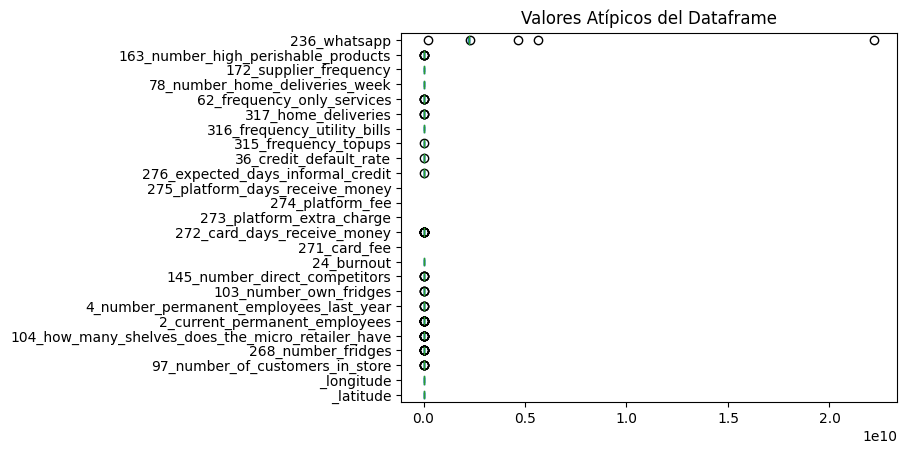

In [11]:
#Realizamos diagrama de caja o bigote de cada columna del dataframe
fig = plt.figure(figsize =(15, 8))
data2.plot(kind='box', vert=False)
plt.title("Valores Atípicos del Dataframe")
plt.show() #dibujamos el diagrama

In [12]:
#Método aplicando desviación estandar. Encuentro los valores extremos
y=data2
Limite_Superior= y.mean() + 3*y.std()
Limite_Inferior= y.mean() - 3*y.std()
print("Limite superior permitido", Limite_Superior)
print("Limite inferior permitido", Limite_Inferior)

Limite superior permitido _latitude                                            1.911117e+01
_longitude                                          -9.809030e+01
97_number_of_customers_in_store                      6.591777e+00
268_number_fridges                                   1.023215e+01
104_how_many_shelves_does_the_micro_retailer_have    5.581292e+01
2_current_permanent_employees                        1.646351e+01
4_number_permanent_employees_last_year               1.600420e+01
103_number_own_fridges                               1.464393e+01
145_number_direct_competitors                        1.485948e+01
24_burnout                                           1.075893e+01
271_card_fee                                                  NaN
272_card_days_receive_money                          3.682975e+00
273_platform_extra_charge                                     NaN
274_platform_fee                                              NaN
275_platform_days_receive_money                   

<ipython-input-12-4c899ed993c2>:3: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  Limite_Superior= y.mean() + 3*y.std()
<ipython-input-12-4c899ed993c2>:3: FutureWarning: The default value of numeric_only in DataFrame.std is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  Limite_Superior= y.mean() + 3*y.std()
<ipython-input-12-4c899ed993c2>:4: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence th

In [13]:
#Encontramos Ouliers del Dataframe
outliers= data2[(y>Limite_Superior)|(y<Limite_Inferior)]
outliers

<ipython-input-13-b3686d19c4d6>:2: FutureWarning: Automatic reindexing on DataFrame vs Series comparisons is deprecated and will raise ValueError in a future version. Do `left, right = left.align(right, axis=1, copy=False)` before e.g. `left == right`
  outliers= data2[(y>Limite_Superior)|(y<Limite_Inferior)]


,_record_id,_title,_server_updated_at,_updated_by,_geometry,_latitude,_longitude,228_store_name,229_store_picture,232_type_of_store,...,261_technology_organization,262_technology_serve_customers,263_technology_secure_sales,264_technology_budget,267_technology_investment_customer_preferences,234_willingness_participate_workshop,318_shopkeeper_name,319_shopkeepers_last_name,236_whatsapp,235_email
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
166,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
167,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
168,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
169,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [14]:
#Obtenemos datos y los outliers se convierten en nulos en el DataFrame
data3= data2[(y<=Limite_Superior)&(y>=Limite_Inferior)]
data3

<ipython-input-14-1e038dbc0c4a>:2: FutureWarning: Automatic reindexing on DataFrame vs Series comparisons is deprecated and will raise ValueError in a future version. Do `left, right = left.align(right, axis=1, copy=False)` before e.g. `left == right`
  data3= data2[(y<=Limite_Superior)&(y>=Limite_Inferior)]


,_record_id,_title,_server_updated_at,_updated_by,_geometry,_latitude,_longitude,228_store_name,229_store_picture,232_type_of_store,...,261_technology_organization,262_technology_serve_customers,263_technology_secure_sales,264_technology_budget,267_technology_investment_customer_preferences,234_willingness_participate_workshop,318_shopkeeper_name,319_shopkeepers_last_name,236_whatsapp,235_email
0,NaN,NaN,NaN,NaN,NaN,19.053536,-98.233822,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,19.053561,-98.234142,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,19.058655,-98.232300,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,19.059293,-98.233158,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,19.059585,-98.233864,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
166,NaN,NaN,NaN,NaN,NaN,19.043115,-98.194066,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
167,NaN,NaN,NaN,NaN,NaN,19.042794,-98.193802,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
168,NaN,NaN,NaN,NaN,NaN,19.042809,-98.193439,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
169,NaN,NaN,NaN,NaN,NaN,19.042558,-98.193818,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [15]:
#Reemplazamos valores atípicos (nulos) del dataframe con "mean"
#Realizamos una copia del dataframe
data_clean=data2.copy()
data_clean=data_clean.fillna(round(data2.mean(),1))
data_clean

<ipython-input-15-8643cb9e6a5a>:4: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  data_clean=data_clean.fillna(round(data2.mean(),1))


,_record_id,_title,_server_updated_at,_updated_by,_geometry,_latitude,_longitude,228_store_name,229_store_picture,232_type_of_store,...,261_technology_organization,262_technology_serve_customers,263_technology_secure_sales,264_technology_budget,267_technology_investment_customer_preferences,234_willingness_participate_workshop,318_shopkeeper_name,319_shopkeepers_last_name,236_whatsapp,235_email
0,dff2998e-af74-4de6-8efd-488aca24e67b,"November 12, 2022",2022-11-12 22:15:10 UTC,Salomon Abdala Perez,SRID=4326;POINT(-98.233822273 19.0535362706),19.053536,-98.233822,Eugene’s Compostura,1 Photo,Tailor,...,NaN,NaN,NaN,NaN,NaN,no,NaN,NaN,2.790144e+09,NaN
1,c596412f-4fc2-4983-acba-d9565859e42f,"November 12, 2022",2022-11-12 22:15:09 UTC,Salomon Abdala Perez,SRID=4326;POINT(-98.2341421351 19.0535610353),19.053561,-98.234142,Frutas y verduras Angy,1 Photo,Grocery store (aka. nanostore),...,NaN,NaN,NaN,NaN,NaN,no,NaN,NaN,2.790144e+09,NaN
2,5bb632b3-41b5-4fb6-a817-b564e8b45a48,"November 12, 2022",2022-11-12 22:15:09 UTC,Salomon Abdala Perez,SRID=4326;POINT(-98.232299887 19.058654656),19.058655,-98.232300,Libélula,1 Photo,Grocery store (aka. nanostore),...,NaN,NaN,NaN,NaN,NaN,no,NaN,NaN,2.790144e+09,NaN
3,6774a0f6-bab4-4a58-bf94-95ad0b7cb438,"November 12, 2022",2022-11-12 22:15:09 UTC,Salomon Abdala Perez,SRID=4326;POINT(-98.2331576513 19.0592929035),19.059293,-98.233158,Quality fix,1 Photo,Grocery store (aka. nanostore),...,NaN,NaN,NaN,NaN,NaN,no,NaN,NaN,2.790144e+09,NaN
4,6cc637fa-3d54-48c7-9499-6de13d0a26aa,"November 12, 2022",2022-11-12 22:15:08 UTC,Salomon Abdala Perez,SRID=4326;POINT(-98.2338639604 19.0595846029),19.059585,-98.233864,Artesanías Los Pinos,1 Photo,Grocery store (aka. nanostore),...,NaN,NaN,NaN,NaN,NaN,no,NaN,NaN,2.790144e+09,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
166,2413f06e-15cc-4a6f-8e83-5224c6824b12,"November 3, 2022",2022-11-03 16:50:48 UTC,Emilio Garza,SRID=4326;POINT(-98.1940658722 19.0431145635),19.043115,-98.194066,July Store,1 Photo,Grocery store (aka. nanostore),...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.790144e+09,NaN
167,962bf5a6-1eff-4874-a627-9cd8e3ca27b4,"November 3, 2022",2022-11-03 16:28:15 UTC,Emilio Garza,SRID=4326;POINT(-98.1938023854 19.0427938182),19.042794,-98.193802,Miscelánea rubí,1 Photo,Grocery store (aka. nanostore),...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.790144e+09,NaN
168,9ff658db-4dc5-48b6-aa0b-5c6668bb6720,"November 3, 2022",2022-11-03 16:28:14 UTC,Emilio Garza,SRID=4326;POINT(-98.1934387078 19.0428094171),19.042809,-98.193439,La fonda,1 Photo,Micro-restaurant (aka. fondita),...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.790144e+09,NaN
169,e88aa9c1-dc8b-4180-99a1-2e0118ad905d,"November 3, 2022",2022-11-03 16:18:37 UTC,Francisco Adán,SRID=4326;POINT(-98.193818 19.042558),19.042558,-98.193818,"Birria de Res ""Hermanos Negreros 2"" estilo Tij...",1 Photo,Micro-restaurant (aka. fondita),...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.790144e+09,NaN


In [16]:
freq_tbl(data_clean)

                               _record_id  frequency  percentage  \
0    dff2998e-af74-4de6-8efd-488aca24e67b          1    0.005848   
1    53c25f08-1c1b-4c1c-97d5-b45c940735cc          1    0.005848   
2    af5c48b5-a916-47a6-aacc-1128ea1e728e          1    0.005848   
3    4790411b-df1d-44f0-a659-6d99e26ae765          1    0.005848   
4    e70db20a-25db-412b-9a71-7df285c92a3d          1    0.005848   
..                                    ...        ...         ...   
166  75bcc709-90ff-4db7-bb82-293f2f72f3ae          1    0.005848   
167  bd59c8b6-81cb-4698-8cfd-dbab7f01ef21          1    0.005848   
168  94b1c6bc-1fb8-4895-aacc-c2604dc12b93          1    0.005848   
169  d9ff4194-657e-4fb4-b5f4-b7e8b350a646          1    0.005848   
170  bf720ff0-3b7d-47ed-ba49-f5d4bfb7293c          1    0.005848   

     cumulative_perc  
0           0.005848  
1           0.011696  
2           0.017544  
3           0.023392  
4           0.029240  
..               ...  
166         0.976608  

1. Análisis Univariado

In [ ]:
#Obtengo un análisis univariado de una variable categórica en específico
table1= freq_tbl(data_clean['214_customer_relationship_tools'])
table1

,214_customer_relationship_tools,frequency,percentage,cumulative_perc
0,Redes sociales,27,0.157895,0.284211
1,Aplicación móvil,21,0.122807,0.505263
2,Ninguna,20,0.116959,0.715789
3,"Aplicación móvil,Redes sociales",13,0.076023,0.852632
4,Cuaderno,6,0.035088,0.915789
5,Teléfono,1,0.005848,0.926316
6,"Cuaderno,Redes sociales",1,0.005848,0.936842
7,"Aplicación móvil,De frente",1,0.005848,0.947368
8,Físico,1,0.005848,0.957895
9,"Aplicación móvil,Ninguna",1,0.005848,0.968421


In [ ]:
#Obtengo un filtro de los valores más reelevantes de la variables categórica seleccionada
Filtro= table1[table1['frequency']>1]
Filtro

,214_customer_relationship_tools,frequency,percentage,cumulative_perc
0,Redes sociales,27,0.157895,0.284211
1,Aplicación móvil,21,0.122807,0.505263
2,Ninguna,20,0.116959,0.715789
3,"Aplicación móvil,Redes sociales",13,0.076023,0.852632
4,Cuaderno,6,0.035088,0.915789


<Axes: xlabel='frequency', ylabel='cumulative_perc'>

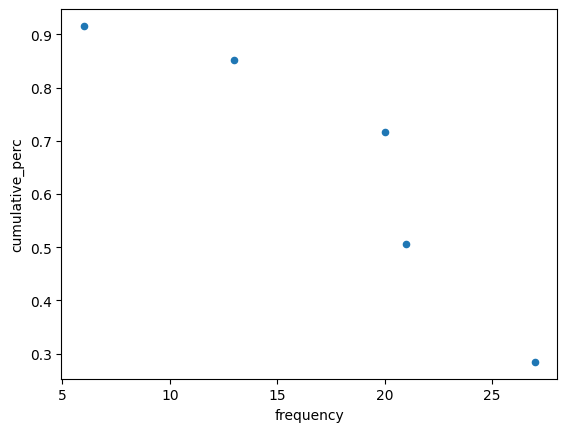

In [ ]:
#Realizamos grafico de dispersión del dataframe filtrado
Filtro_index.plot("frequency", "cumulative_perc", kind="scatter")

2. Análisis Univariado

In [ ]:
#Obtengo un análisis univariado de una variable categórica en específico
table2= freq_tbl(data_clean['185_place_orders_suppliers'])
table2

,185_place_orders_suppliers,frequency,percentage,cumulative_perc
0,En persona,20,0.116959,0.281690
1,Mensajería instantánea (e.g. WhatsApp),8,0.046784,0.394366
2,"En persona,Llamada telefónica,Mensajería insta...",7,0.040936,0.492958
3,Llamada telefónica,6,0.035088,0.577465
4,"En persona,Mensajería instantánea (e.g. WhatsApp)",5,0.029240,0.647887
5,"En persona,Llamada telefónica",5,0.029240,0.718310
6,Página web del proveedor,5,0.029240,0.788732
7,"Mensaje de texto (SMS),Mensajería instantánea ...",2,0.011696,0.816901
8,"En persona,Página web del proveedor",2,0.011696,0.845070
9,Mensaje de texto (SMS),2,0.011696,0.873239


In [ ]:
#Obtengo un filtro de los valores más reelevantes de la variables categórica seleccionada
Filtro2= table1[table2['frequency']>1]
Filtro2

,185_place_orders_suppliers,frequency,percentage,cumulative_perc
0,En persona,20,0.116959,0.281690
1,Mensajería instantánea (e.g. WhatsApp),8,0.046784,0.394366
2,"En persona,Llamada telefónica,Mensajería insta...",7,0.040936,0.492958
3,Llamada telefónica,6,0.035088,0.577465
4,"En persona,Mensajería instantánea (e.g. WhatsApp)",5,0.029240,0.647887
5,"En persona,Llamada telefónica",5,0.029240,0.718310
6,Página web del proveedor,5,0.029240,0.788732
7,"Mensaje de texto (SMS),Mensajería instantánea ...",2,0.011696,0.816901
8,"En persona,Página web del proveedor",2,0.011696,0.845070
9,Mensaje de texto (SMS),2,0.011696,0.873239


In [ ]:
#Ajusto el indice de mi dataframe
Filtro_index2= Filtro2.set_index('185_place_orders_suppliers')
Filtro_index2

,frequency,percentage,cumulative_perc
185_place_orders_suppliers,,,
En persona,20,0.116959,0.281690
Mensajería instantánea (e.g. WhatsApp),8,0.046784,0.394366
"En persona,Llamada telefónica,Mensajería instantánea (e.g. WhatsApp)",7,0.040936,0.492958
Llamada telefónica,6,0.035088,0.577465
"En persona,Mensajería instantánea (e.g. WhatsApp)",5,0.029240,0.647887
"En persona,Llamada telefónica",5,0.029240,0.718310
Página web del proveedor,5,0.029240,0.788732
"Mensaje de texto (SMS),Mensajería instantánea (e.g. WhatsApp)",2,0.011696,0.816901
"En persona,Página web del proveedor",2,0.011696,0.845070


<Axes: ylabel='frequency'>

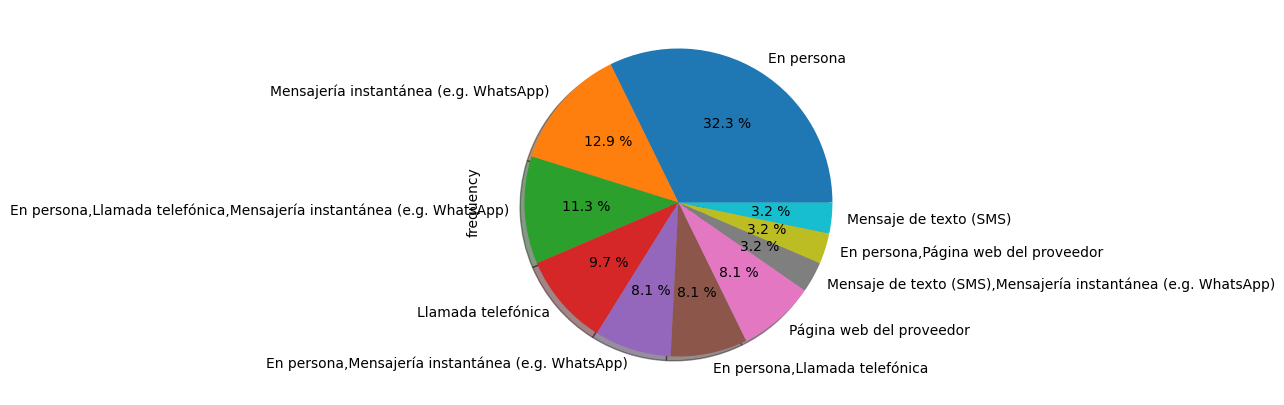

In [ ]:
#Realizamos grafico de pastel del dataframe filtrado
Filtro_index2["frequency"].plot(kind='pie', figsize=(10,5), shadow=True, autopct="%0.1f %%")

3. Análisis Univariado

In [ ]:
#Obtengo un análisis univariado de una variable categórica en específico
table3= freq_tbl(data_clean['278_credit_interest'])
table3

,278_credit_interest,frequency,percentage,cumulative_perc
0,0,29,0.169591,0.763158
1,3-5%,4,0.023392,0.868421
2,1-2%,3,0.017544,0.947368
3,9%+,1,0.005848,0.973684
4,6-8%,1,0.005848,1.000000


<Axes: >

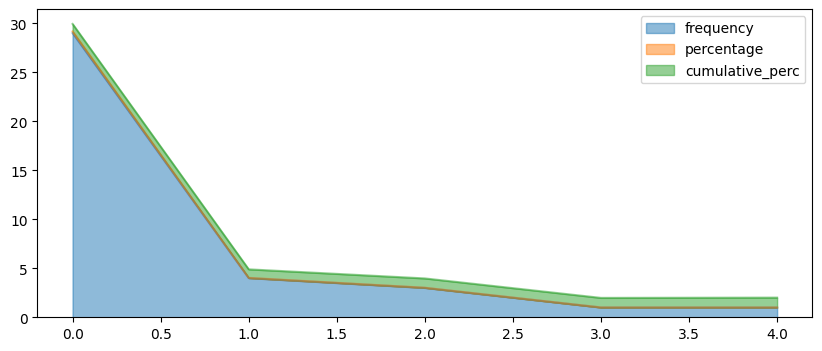

In [ ]:
#Realizamos grafico de área del dataframe filtrado
table3.plot(kind='area', figsize=(10,4),alpha = 0.5)

4. Análisis Univariado

In [ ]:
#Obtengo un análisis univariado de una variable categórica en específico
table4= freq_tbl(data_clean['263_technology_secure_sales'])
table4

,263_technology_secure_sales,frequency,percentage,cumulative_perc
0,De acuerdo,29,0.169591,0.414286
1,Totalmente de acuerdo,14,0.081871,0.614286
2,Totalmente en desacuerdo,13,0.076023,0.800000
3,Ni de acuerdo ni en desacuerdo,8,0.046784,0.914286
4,En desacuerdo,6,0.035088,1.000000


<Axes: xlabel='frequency', ylabel='cumulative_perc'>

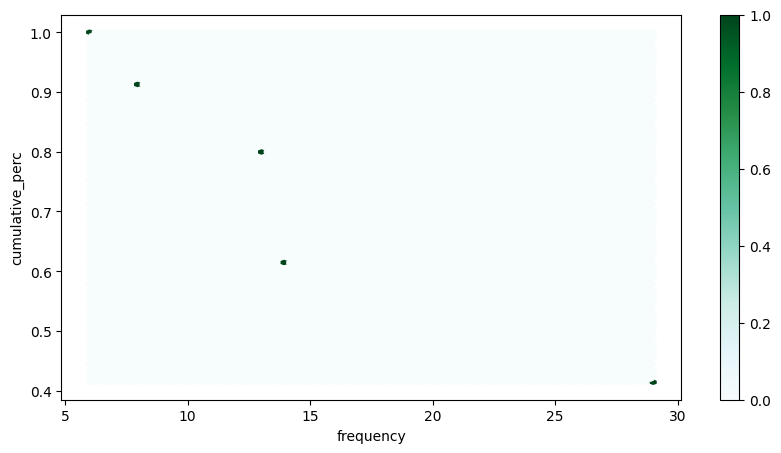

In [ ]:
#Realizamos grafico hexagonal del dataframe filtrado, alternativo al scatter plot
table4.plot.hexbin("frequency", "cumulative_perc", figsize=(10,5))

5. Análisis Univariado

In [ ]:
#Obtengo un análisis univariado de una variable categórica en específico
table5= freq_tbl(data_clean['227_agreement_ecommerce_platforms'])
table5

,227_agreement_ecommerce_platforms,frequency,percentage,cumulative_perc
0,no,88,0.51462,0.897959
1,yes,10,0.05848,1.000000


<Axes: ylabel='frequency'>

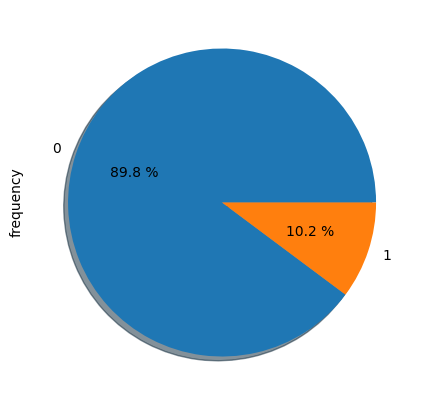

In [ ]:
#Realizamos grafico de pastel del dataframe filtrado
table5["frequency"].plot(kind='pie', figsize=(10,5), shadow=True, autopct="%0.1f %%")

6. Análisis Univariado

In [ ]:
#Obtengo un análisis univariado de una variable categórica en específico
table6= freq_tbl(data_clean['262_technology_serve_customers'])
table6

,262_technology_serve_customers,frequency,percentage,cumulative_perc
0,De acuerdo,25,0.146199,0.352113
1,Totalmente de acuerdo,20,0.116959,0.633803
2,Totalmente en desacuerdo,12,0.070175,0.802817
3,Ni de acuerdo ni en desacuerdo,11,0.064327,0.957746
4,En desacuerdo,3,0.017544,1.000000


<Axes: xlabel='frequency', ylabel='cumulative_perc'>

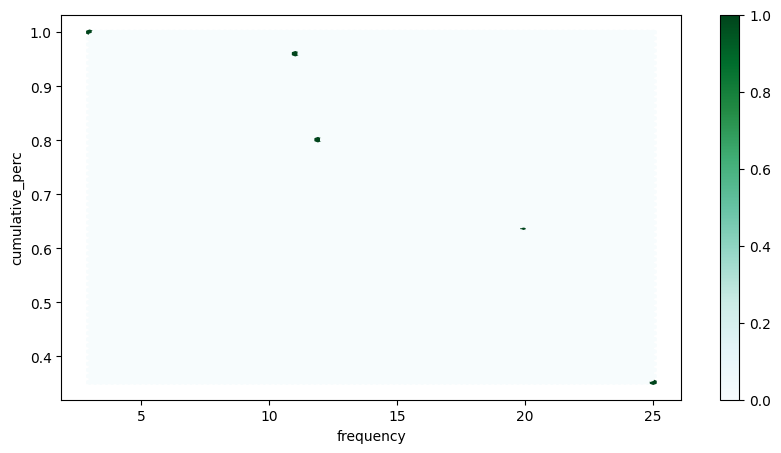

In [ ]:
#Realizamos grafico hexagonal del dataframe filtrado, alternativo al scatter plot
table6.plot.hexbin("frequency", "cumulative_perc", figsize=(10,5))

7. Análisis Univariado

In [ ]:
#Obtengo un análisis univariado de una variable categórica en específico
table7= freq_tbl(data_clean['49_inventory_records'])
table7

,49_inventory_records,frequency,percentage,cumulative_perc
0,En papel,40,0.233918,0.363636
1,Software especializado + computadora,21,0.122807,0.554545
2,En Excel,20,0.116959,0.736364
3,No lo hago,18,0.105263,0.900000
4,"En Excel,En papel",7,0.040936,0.963636
5,Mentalmente,1,0.005848,0.972727
6,Aplicación móvil (i.e. App) + smartphone,1,0.005848,0.981818
7,"En papel,Mental",1,0.005848,0.990909
8,"Aplicación móvil (i.e. App) + smartphone,En Excel",1,0.005848,1.000000


Text(0, 0.5, 'Frecuencia')

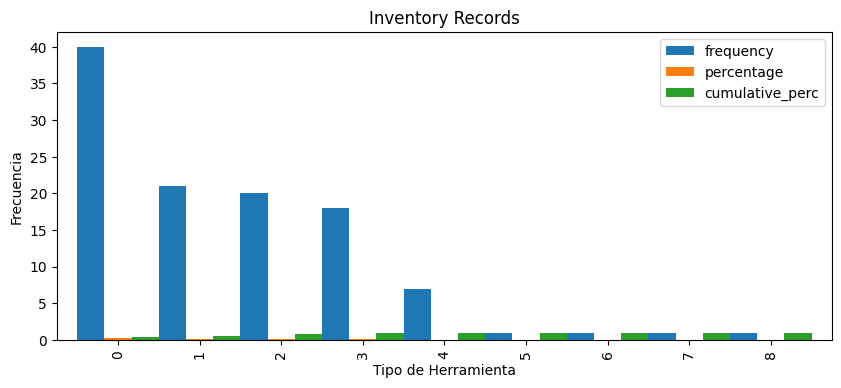

In [ ]:
#Realizamos grafico de barras del dataframe filtrado
table7.plot(kind = 'bar', width=1, figsize=(10,4))
plt.title('Inventory Records')
plt.xlabel('Tipo de Herramienta')
plt.ylabel('Frecuencia')

8. Análisis Univariado

In [ ]:
#Obtengo un análisis univariado de una variable categórica en específico
table8= freq_tbl(data_clean['20_reviews_finances_monthly'])
table8

,20_reviews_finances_monthly,frequency,percentage,cumulative_perc
0,yes,79,0.461988,0.731481
1,no,29,0.169591,1.000000


<Axes: ylabel='frequency'>

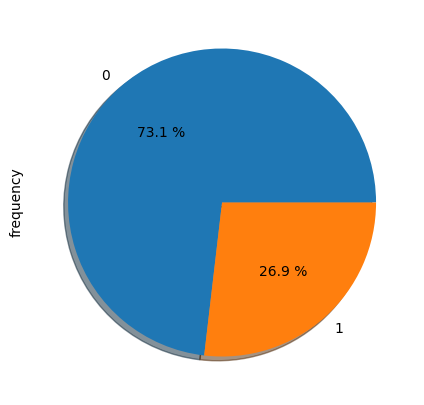

In [ ]:
#Realizamos grafico de pastel del dataframe filtrado
table8["frequency"].plot(kind='pie', figsize=(10,5), shadow=True, autopct="%0.1f %%")

9. Análisis Univariado

In [ ]:
#Obtengo un análisis univariado de una variable categórica en específico
table9= freq_tbl(data_clean['277_payment_method_suppliers'])
table9

,277_payment_method_suppliers,frequency,percentage,cumulative_perc
0,Efectivo,43,0.251462,0.632353
1,"Efectivo,Transferencia interbancaria",8,0.046784,0.750000
2,Transferencia interbancaria,7,0.040936,0.852941
3,"Efectivo,Tarjeta de débito y/o crédito",4,0.023392,0.911765
4,Tarjeta de débito y/o crédito,4,0.023392,0.970588
5,"Efectivo,Tarjeta de débito y/o crédito,Transfe...",2,0.011696,1.000000


<Axes: xlabel='frequency', ylabel='cumulative_perc'>

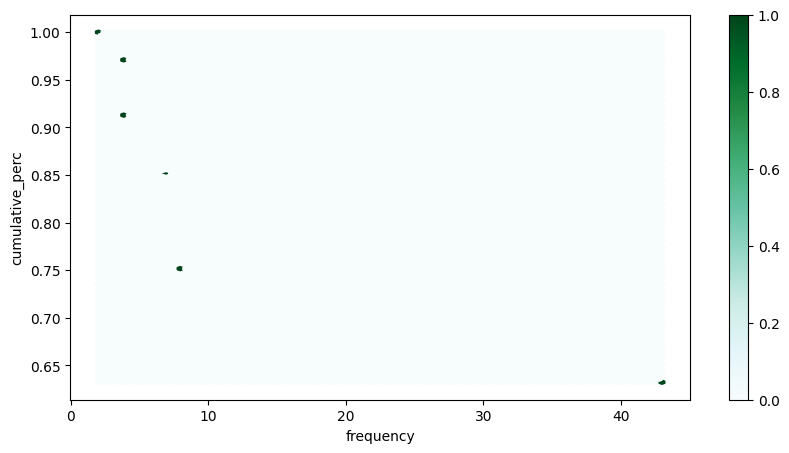

In [ ]:
#Realizamos grafico hexagonal del dataframe filtrado, alternativo al scatter plot
table9.plot.hexbin("frequency", "cumulative_perc", figsize=(10,5))

10. Análisis Univariado

In [ ]:
#Obtengo un análisis univariado de una variable categórica en específico
table10= freq_tbl(data_clean['56_procurement_changes_pandemic'])
table10

,56_procurement_changes_pandemic,frequency,percentage,cumulative_perc
0,no,55,0.321637,0.679012
1,yes,26,0.152047,1.000000


<Axes: ylabel='frequency'>

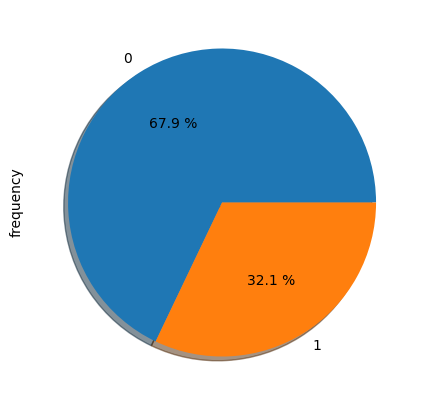

In [ ]:
#Realizamos grafico de pastel del dataframe filtrado
table10["frequency"].plot(kind='pie', figsize=(10,5), shadow=True, autopct="%0.1f %%")

11. Análisis Univariado

In [17]:
#Obtengo un análisis univariado de una variable categórica en específico
table11= freq_tbl(data_clean['186_internet_connection'])
table11

,186_internet_connection,frequency,percentage,cumulative_perc
0,yes,76,0.444444,0.703704
1,no,32,0.187135,1.000000


<Axes: xlabel='frequency', ylabel='cumulative_perc'>

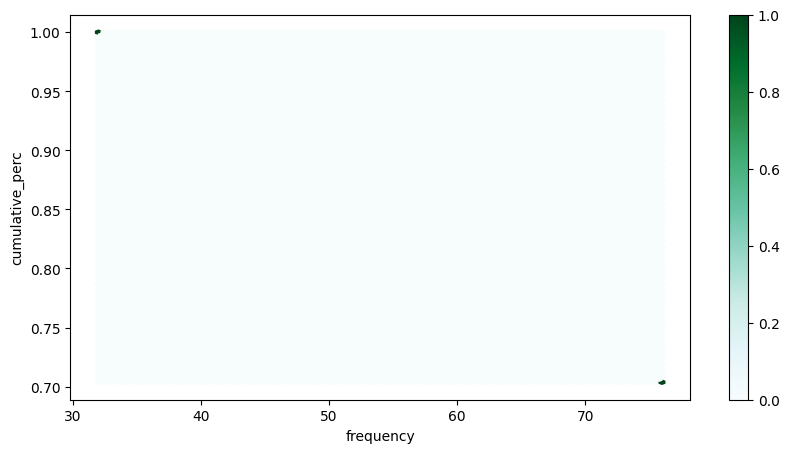

In [18]:
#Realizamos grafico hexagonal del dataframe filtrado, alternativo al scatter plot
table11.plot.hexbin("frequency", "cumulative_perc", figsize=(10,5))

12. Análisis Univariado

In [19]:
#Obtengo un análisis univariado de una variable categórica en específico
table12= freq_tbl(data_clean['267_technology_investment_customer_preferences'])
table12

,267_technology_investment_customer_preferences,frequency,percentage,cumulative_perc
0,Totalmente de acuerdo,29,0.169591,0.414286
1,De acuerdo,24,0.140351,0.757143
2,Totalmente en desacuerdo,13,0.076023,0.942857
3,En desacuerdo,2,0.011696,0.971429
4,Ni de acuerdo ni en desacuerdo,2,0.011696,1.000000


Text(0, 0.5, 'Frecuencia')

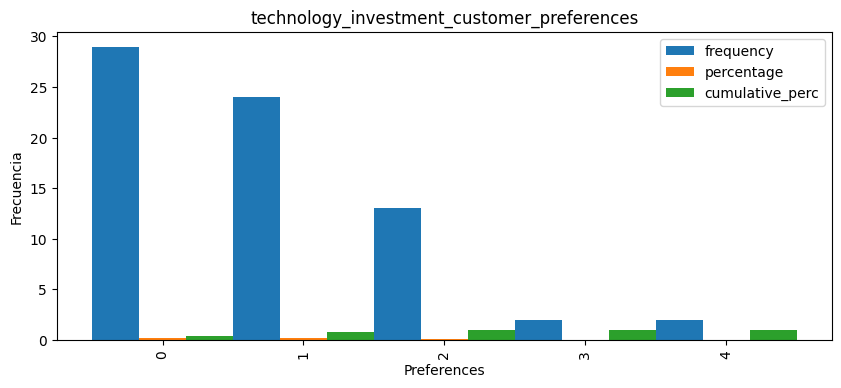

In [20]:
#Realizamos grafico de barras del dataframe filtrado
table12.plot(kind = 'bar', width=1, figsize=(10,4))
plt.title('technology_investment_customer_preferences')
plt.xlabel('Preferences')
plt.ylabel('Frecuencia')

13. Análisis Univariado

In [21]:
#Obtengo un análisis univariado de una variable categórica en específico
table13= freq_tbl(data_clean['234_willingness_participate_workshop'])
table13

,234_willingness_participate_workshop,frequency,percentage,cumulative_perc
0,no,49,0.28655,0.5
1,yes,49,0.28655,1.0


<Axes: ylabel='frequency'>

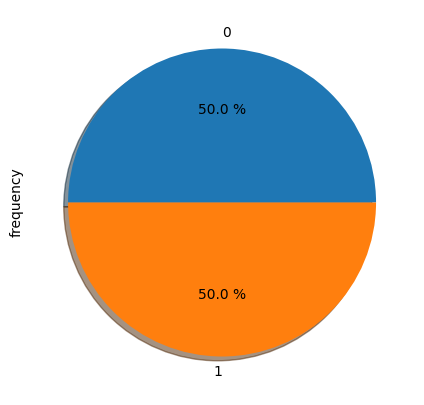

In [22]:
#Realizamos grafico de pastel del dataframe filtrado
table13["frequency"].plot(kind='pie', figsize=(10,5), shadow=True, autopct="%0.1f %%")

14. Análisis Univariado

In [24]:
#Obtengo un análisis univariado de una variable categórica en específico
table14= freq_tbl(data_clean['249_technology_training'])
table14

,249_technology_training,frequency,percentage,cumulative_perc
0,Totalmente de acuerdo,37,0.216374,0.506849
1,De acuerdo,21,0.122807,0.794521
2,Totalmente en desacuerdo,8,0.046784,0.904110
3,Ni de acuerdo ni en desacuerdo,6,0.035088,0.986301
4,En desacuerdo,1,0.005848,1.000000


15. Análisis Univariado

In [25]:
#Obtengo un análisis univariado de una variable categórica en específico
table15= freq_tbl(data_clean['313_home_deliveries'])
table15

,313_home_deliveries,frequency,percentage,cumulative_perc
0,Totalmente en desacuerdo,25,0.146199,0.431034
1,Totalmente de acuerdo,14,0.081871,0.672414
2,Algo de acuerdo,11,0.064327,0.862069
3,Algo en desacuerdo,5,0.029240,0.948276
4,Ni de acuerdo ni en desacuerdo,3,0.017544,1.000000


<Axes: xlabel='frequency', ylabel='cumulative_perc'>

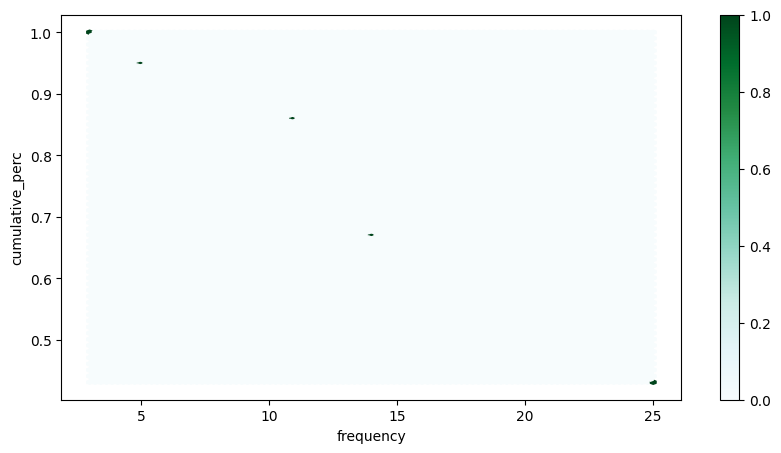

In [26]:
#Realizamos grafico hexagonal del dataframe filtrado, alternativo al scatter plot
table15.plot.hexbin("frequency", "cumulative_perc", figsize=(10,5))

16. Análisis Univariado

In [27]:
#Obtengo un análisis univariado de una variable categórica en específico
table16= freq_tbl(data_clean['189_payment_methods'])
table16

,189_payment_methods,frequency,percentage,cumulative_perc
0,Efectivo,40,0.233918,0.373832
1,"Efectivo,Tarjeta de débito y/o crédito,Transfe...",30,0.175439,0.654206
2,"Efectivo,Tarjeta de débito y/o crédito",19,0.111111,0.831776
3,"Efectivo,Transferencia interbancaria",15,0.087719,0.971963
4,"Aplicación móvil (e.g. CODI),Efectivo,Tarjeta ...",1,0.005848,0.981308
5,"Aplicación móvil (e.g. CODI),Efectivo,Tarjeta ...",1,0.005848,0.990654
6,Tarjeta de débito y/o crédito,1,0.005848,1.000000


Text(0, 0.5, 'Frecuencia')

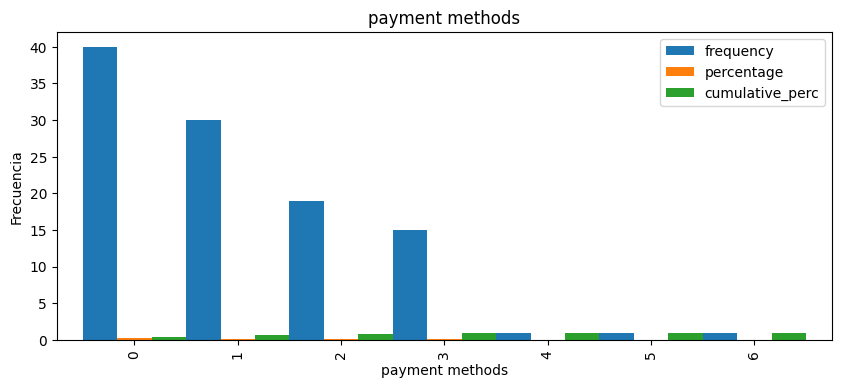

In [28]:
#Realizamos grafico de barras del dataframe filtrado
table16.plot(kind = 'bar', width=1, figsize=(10,4))
plt.title('payment methods')
plt.xlabel('payment methods')
plt.ylabel('Frecuencia')

17. Análisis Univariado

In [29]:
#Obtengo un análisis univariado de una variable categórica en específico
table17= freq_tbl(data_clean['250_technology_investment_operations'])
table17

,250_technology_investment_operations,frequency,percentage,cumulative_perc
0,Totalmente de acuerdo,34,0.198830,0.459459
1,De acuerdo,20,0.116959,0.729730
2,Totalmente en desacuerdo,8,0.046784,0.837838
3,En desacuerdo,6,0.035088,0.918919
4,Ni de acuerdo ni en desacuerdo,6,0.035088,1.000000


<Axes: xlabel='frequency', ylabel='cumulative_perc'>

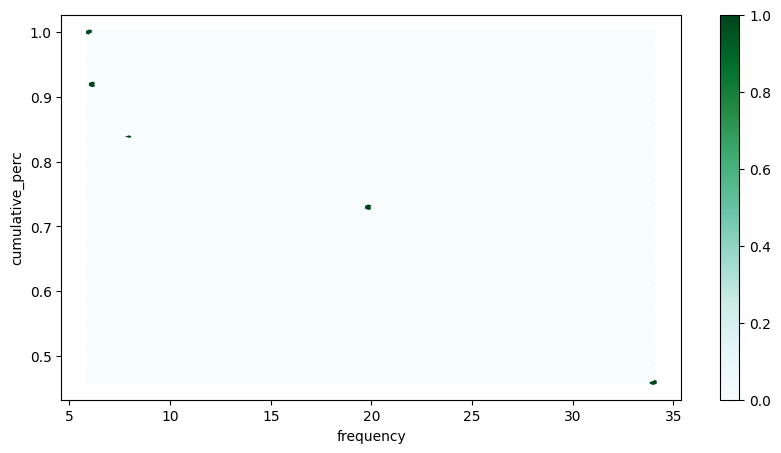

In [30]:
#Realizamos grafico hexagonal del dataframe filtrado, alternativo al scatter plot
table17.plot.hexbin("frequency", "cumulative_perc", figsize=(10,5))

18. Análisis Univariado

In [31]:
#Obtengo un análisis univariado de una variable categórica en específico
table18= freq_tbl(data_clean['260_technology_scalable'])
table18

,260_technology_scalable,frequency,percentage,cumulative_perc
0,Totalmente de acuerdo,35,0.204678,0.507246
1,De acuerdo,14,0.081871,0.710145
2,Ni de acuerdo ni en desacuerdo,8,0.046784,0.826087
3,En desacuerdo,6,0.035088,0.913043
4,Totalmente en desacuerdo,6,0.035088,1.000000


19. Análisis Univariado

In [32]:
#Obtengo un análisis univariado de una variable categórica en específico
table19= freq_tbl(data_clean['157_frequency_organize_shelves'])
table19

,157_frequency_organize_shelves,frequency,percentage,cumulative_perc
0,Semanalmente,40,0.233918,0.416667
1,Diariamente,32,0.187135,0.750000
2,Nunca,8,0.046784,0.833333
3,Mensualmente,7,0.040936,0.906250
4,Quincenalmente,5,0.029240,0.958333
5,Anualmente,2,0.011696,0.979167
6,Semestralmente,1,0.005848,0.989583
7,No se tiene,1,0.005848,1.000000


Text(0, 0.5, 'Frecuencia')

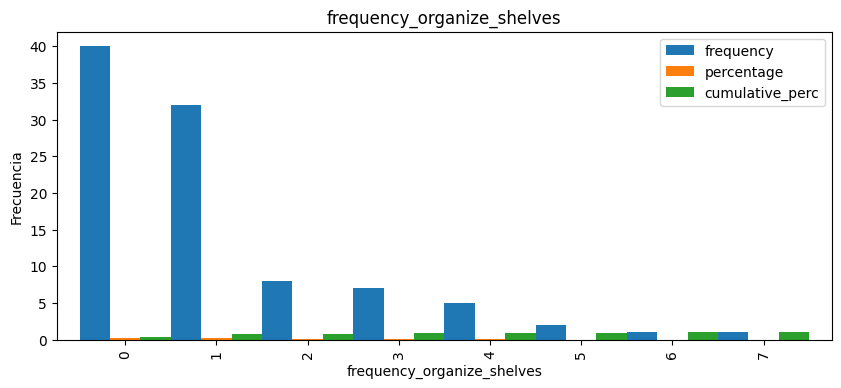

In [33]:
#Realizamos grafico de barras del dataframe filtrado
table19.plot(kind = 'bar', width=1, figsize=(10,4))
plt.title('frequency_organize_shelves')
plt.xlabel('frequency_organize_shelves')
plt.ylabel('Frecuencia')

20. Análisis Univariado

In [34]:
#Obtengo un análisis univariado de una variable categórica en específico
table20= freq_tbl(data_clean['314_reception_delivery_packages'])
table20

,314_reception_delivery_packages,frequency,percentage,cumulative_perc
0,Totalmente en desacuerdo,46,0.269006,0.676471
1,Algo de acuerdo,9,0.052632,0.808824
2,Totalmente de acuerdo,8,0.046784,0.926471
3,Ni de acuerdo ni en desacuerdo,3,0.017544,0.970588
4,Algo en desacuerdo,2,0.011696,1.000000


<Axes: ylabel='frequency'>

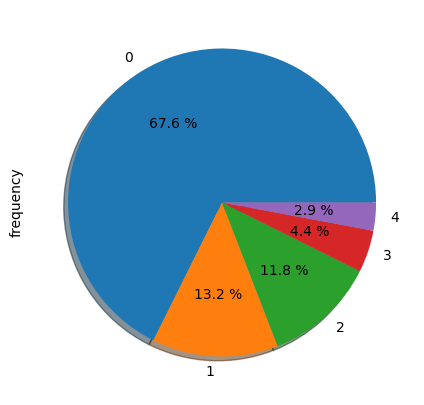

In [35]:
#Realizamos grafico de pastel del dataframe filtrado
table20["frequency"].plot(kind='pie', figsize=(10,5), shadow=True, autopct="%0.1f %%")

In [36]:
data_clean.to_csv("microretailer_mit_lift_lab_clean.csv")
#descargar archivo filtrado en csv
from google.colab import files 
  
  
files.download("microretailer_mit_lift_lab_clean.csv")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>